In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load the data
df = pd.read_csv('gamesss.csv')


#View the data
df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [3]:
df['title'].value_counts().head()

Loop               4
Dark Matter        3
Cursed             3
Beyond the Wall    3
Outpost            3
Name: title, dtype: int64

In [4]:
#Basic information

df.info()

#Describe the data

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.087200e+04,50872.000000,5.087200e+04,50872.000000,50872.000000,50872.000000
mean,1.055224e+06,77.052033,1.824425e+03,8.620325,8.726788,5.592212
std,6.103249e+05,18.253592,4.007352e+04,11.514164,11.507021,18.606679
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.287375e+05,67.000000,1.900000e+01,0.990000,0.990000,0.000000
50%,9.860850e+05,81.000000,4.900000e+01,4.990000,4.990000,0.000000
75%,1.524895e+06,91.000000,2.060000e+02,10.990000,11.990000,0.000000
max,2.599300e+06,100.000000,7.494460e+06,299.990000,299.990000,90.000000


In [5]:
# to_datetime is used to convert into datetime dtype
df['date_release']=pd.to_datetime(df['date_release'])
df['release_year'] = df['date_release'].dt.year

In [3]:
#popular games of 2022 with positive reviews
game_data1=df.loc[(df['date_release'].dt.year==2022) & (df['positive_ratio']>=90)].sort_values(['user_reviews','positive_ratio'],ascending=[False,False]).head(10)
game_data1[['title','user_reviews','positive_ratio']]

,title,user_reviews,positive_ratio
14453,ELDEN RING,528702,92
15096,Raft,240299,93
15281,Vampire Survivors,197109,98
13274,Stray,111376,97
14414,God of War,76981,96
48422,Teardown,71271,96
48967,Marvel’s Spider-Man Remastered,53844,96
13206,Cult of the Lamb,50890,94
15078,PowerWash Simulator,34548,97
3333,Persona 5 Royal,32261,97


In [4]:
#popular games of 2022 with mixed or lower reviews
game_data2=df.loc[(df['date_release'].dt.year==2022) & (df['positive_ratio']<70)].sort_values(['user_reviews','positive_ratio'],ascending=[False,True]).head(10)
game_data2[['title','user_reviews','positive_ratio']]

,title,user_reviews,positive_ratio
15358,Call of Duty®,429206,59
48952,EA SPORTS™ FIFA 23,113742,54
37509,Mirror 2: Project X,110981,26
12777,Warhammer 40000: Darktide,61373,55
12659,Total War: WARHAMMER III,60471,62
18593,World War 3,49594,54
48152,The Cycle: Frontier,43073,61
48678,Dread Hunger,40000,61
49015,NBA 2K23,34522,64
13200,Victoria 3,23019,66


In [21]:
t = pd.concat([df, series_titles.to_frame(name='series_title')], axis=1)
t.sort_values(by=['series_title', 'date_release'], axis=0, inplace=True)
t.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,series_title
35596,449940,! That Bastard Is Trying To Steal Our Gold !,2016-03-03,True,False,True,Mixed,58,51,2.99,2.99,0.0,True,! That Bastard Is Trying To Steal Our Gold !
25867,1287250,! Wild Russia !,2020-04-28,True,False,False,Mixed,63,57,1.99,19.99,90.0,True,! Wild Russia !
32120,866510,!AnyWay!,2018-06-06,True,False,False,Mostly Positive,70,345,1.99,1.99,0.0,True,!AnyWay!
42958,870990,!LABrpgUP!,2018-06-13,True,False,False,Mixed,50,14,0.99,0.99,0.0,True,!LABrpgUP!
37040,861520,#AkiRobots,2020-12-04,True,True,True,Positive,93,15,7.99,7.99,0.0,True,#AkiRobots


In [23]:
t[t['series_title'] == 'Prince of Persia']

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,series_title
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,Prince of Persia
19153,13530,Prince of Persia: The Two Thrones™,2008-11-21,True,False,False,Mostly Positive,78,1397,9.99,9.99,0.0,True,Prince of Persia
12694,33320,Prince of Persia: The Forgotten Sands™,2010-06-08,True,False,False,Mixed,68,1660,9.99,9.99,0.0,True,Prince of Persia


In [5]:
#unique values

df['positive_ratio'].unique()

df['user_reviews'].unique()


array([ 2199,    21,  3722, ...,  7096,  4473, 29458], dtype=int64)

In [7]:
#Find null values

df.isnull().sum()

app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

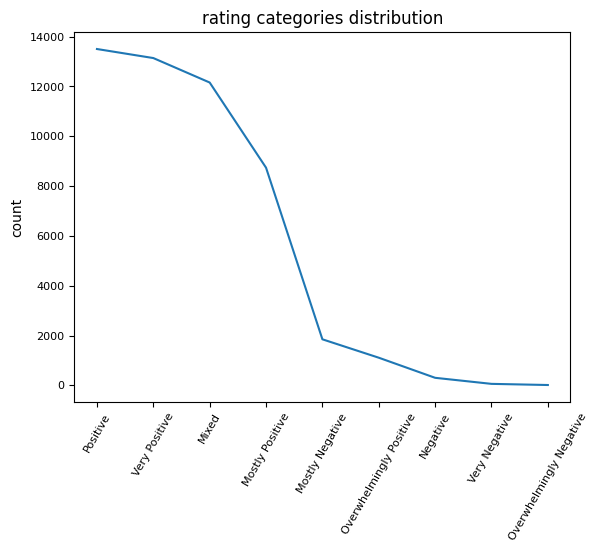

In [9]:
df['rating'].value_counts().plot(xlabel='', ylabel='count', fontsize=8, title='rating categories distribution')
plt.xticks(rotation=60);

In [10]:
df.groupby('rating')['positive_ratio'].agg(['min', 'max'])

,min,max
rating,,
Mixed,40,69
Mostly Negative,20,39
Mostly Positive,70,79
Negative,0,19
Overwhelmingly Negative,9,18
Overwhelmingly Positive,95,100
Positive,80,100
Very Negative,5,19
Very Positive,80,100


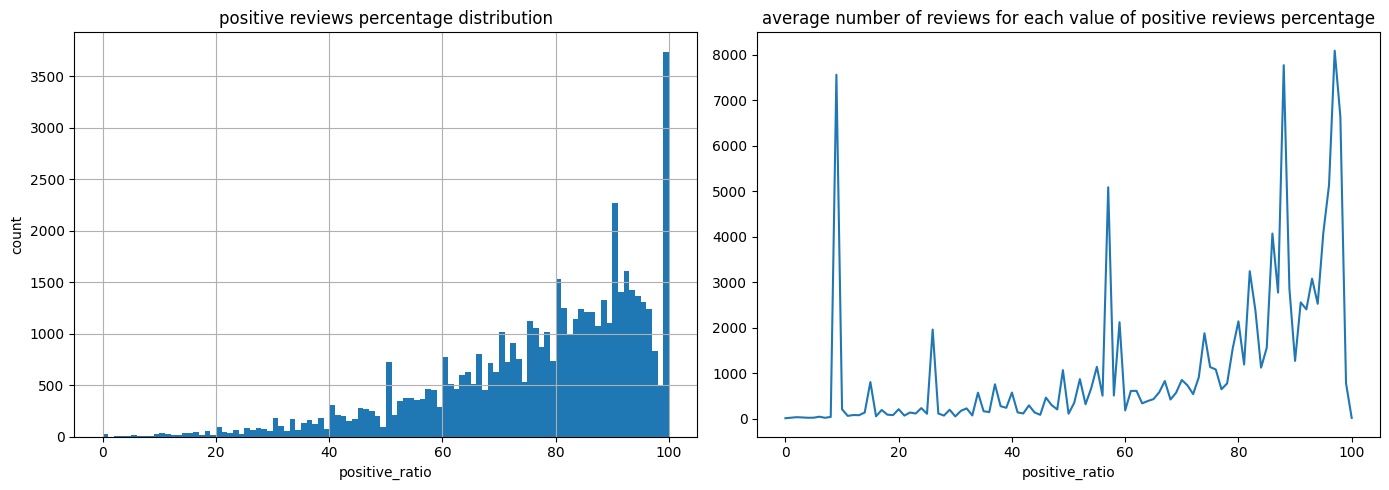

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

df['positive_ratio'].hist(bins=100, ax=ax1)
ax1.set_xlabel('positive_ratio')
ax1.set_ylabel('count')
ax1.set_title('positive reviews percentage distribution')

df.groupby('positive_ratio')['user_reviews'].mean().plot(ax=ax2)
ax2.set_title('average number of reviews for each value of positive reviews percentage')

fig.tight_layout()

In [14]:
series_titles = df['title'].str.split(':').str[0].str.strip() 
is_numeric_sequel = series_titles.str.rsplit(n=1).str[-1].str.isnumeric() 
series_titles[is_numeric_sequel] = series_titles[is_numeric_sequel].str.rsplit(n=1).str[0]

series_titles

0               Prince of Persia
1                          BRINK
2                         Monaco
3             Escape Dead Island
4        Dungeon of the ENDLESS™
                  ...           
50867        I Expect You To Die
50868                     PAYDAY
50869                 Eternights
50870          Forgive Me Father
50871                  FatalZone
Name: title, Length: 50872, dtype: object

In [15]:
# limit the sequel number
N_SEQUEL_LIMIT = 10

# few games have more sequels
(series_titles.value_counts() > N_SEQUEL_LIMIT).sum()

90

In [17]:
t = pd.concat([df, series_titles.to_frame(name='series_title')], axis=1)
t.sort_values(by=['series_title', 'date_release'], axis=0, inplace=True)
t.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,series_title
35596,449940,! That Bastard Is Trying To Steal Our Gold !,2016-03-03,True,False,True,Mixed,58,51,2.99,2.99,0.0,True,! That Bastard Is Trying To Steal Our Gold !
25867,1287250,! Wild Russia !,2020-04-28,True,False,False,Mixed,63,57,1.99,19.99,90.0,True,! Wild Russia !
32120,866510,!AnyWay!,2018-06-06,True,False,False,Mostly Positive,70,345,1.99,1.99,0.0,True,!AnyWay!
42958,870990,!LABrpgUP!,2018-06-13,True,False,False,Mixed,50,14,0.99,0.99,0.0,True,!LABrpgUP!
37040,861520,#AkiRobots,2020-12-04,True,True,True,Positive,93,15,7.99,7.99,0.0,True,#AkiRobots


In [18]:
# create list with df in 'i'th position containing all titles which are 'i'-th sequels
sequels_box = []
for i in range(N_SEQUEL_LIMIT):
    next_mask = t.duplicated('series_title', keep='first')
    c = t[~next_mask].copy()
    sequels_box.append(c)

    t = t[next_mask]

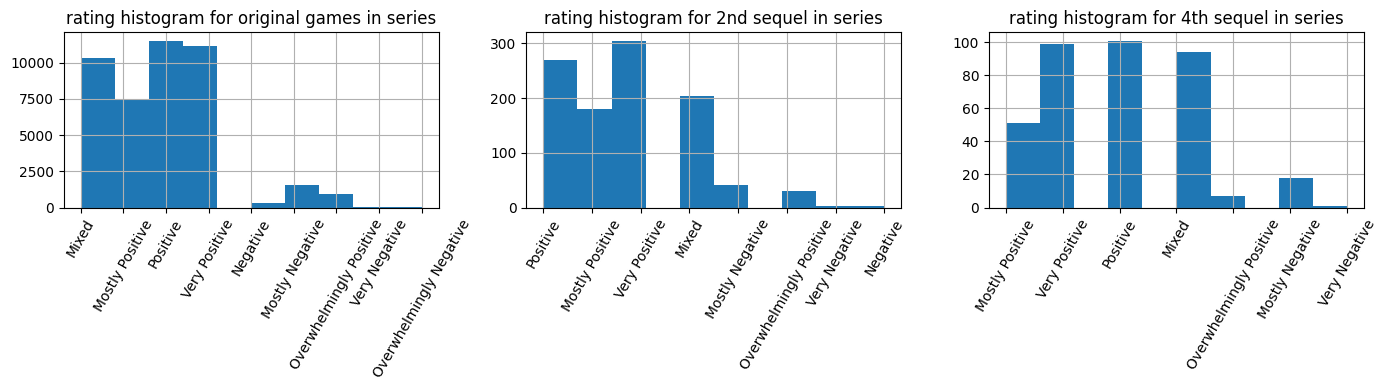

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

sequels_box[0]['rating'].hist(xrot=60, ax=ax1)
sequels_box[2]['rating'].hist(xrot=60, ax=ax2)
sequels_box[4]['rating'].hist(xrot=60, ax=ax3)

ax1.set_title('rating histogram for original games in series')
ax2.set_title('rating histogram for 2nd sequel in series')
ax3.set_title('rating histogram for 4th sequel in series')

fig.tight_layout()